<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/Topic_1/chapter1_diffraction_circular_aperture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Photonic devices and systems - 2D materials dispersion relation (hexagonal Boron Nitride)**

---

# Definitions: van der Waals polariton dispersion relation

In [9]:
'''
Thin Film Dispersion Relation hBN
Eq.1 in Tunable Phonon Polaritons in Atomically Thin van der Waals Crystals of Boron Nitride
S. Dai et al. Science 343, 1125 (2014);
DOI: 10.1126/science.124683
'''
def psi(lambda_):
    return np.sqrt(eps_z(omega(lambda_))) / (1j * np.sqrt(eps_t(omega(lambda_))))

# Modes for a given qy
qy = 0
def qx(lambda_):
    return -(psi(lambda_) / d) * (np.arctan(eps_a / (eps_t(omega(lambda_)) * psi(lambda_))) + np.arctan(eps_s(omega(lambda_)) / (eps_t(omega(lambda_)) * psi(lambda_))) + np.pi * l)

def qz(lambda_):
    return np.sqrt(eps_t(omega(lambda_)) / eps_z(omega(lambda_)) * ((qx(lambda_))**2 + (qy)**2) - eps_t(omega(lambda_)) * ((2.0 * np.pi) / lambda_)**2)


# Optical properties of hBN, substrate and cover

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Constants
h = 6.626e-34  # J*s
c = 3e8  # m/s
e = 1.6021773e-19  # J/eV
flw = 1239.8283  # (h*c)/e * 10^9

def omega(x):
    return flw / x

'''
Dielectric functions for hBN
'''
# eps_per
eps_r1 = 4.90
lambda1 = flw / 0.16939
Lambda_eps1 = 1.93872
Omega1 = flw / lambda1
Gamma1 = 8.67879831e-4
def eps_t(omega):
    return eps_r1 - (Lambda_eps1 * Omega1**2) / (omega**2 - Omega1**2 + 1j * omega * Gamma1)

# eps_par
eps_r2 = 2.95
lambda2 = flw / 0.09423
Lambda_eps2 = 0.52618
Omega2 = flw / lambda2
Gamma2 = 2.47966e-4
def eps_z(omega):
    return eps_r2 - (Lambda_eps2 * Omega2**2) / (omega**2 - Omega2**2 + 1j * omega * Gamma2)

# Dielectric constant for superstrate
eps_a=1.0

# Dielectric constant for substrate
def eps_s(omega):
    return 1.88422  # CaF2 (fixed value)  # CaF2

# Wavelength range

In [11]:
# Wavelength range (nm)
lambda_o = 6200.0
lambda_f = 7400.0
N_lambda = 6000
lambda_range=np.linspace(lambda_o,lambda_f,N_lambda)

# Example of van der Waals polariton dispersion relation

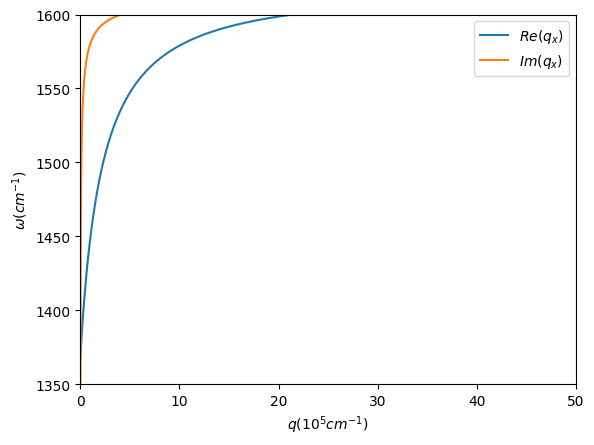

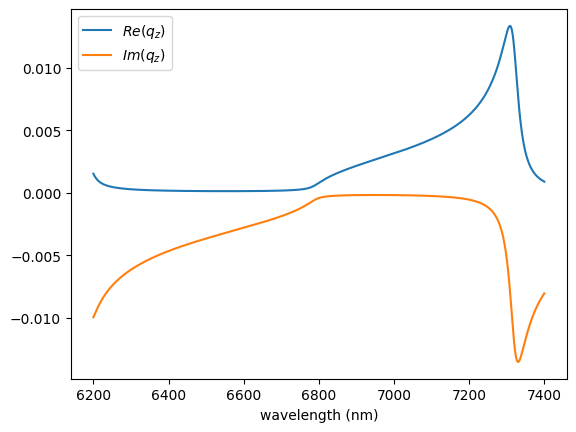

In [12]:
d = 256.0  # Thicknesses (nm)
l = 0      # Mode index

plt.plot(1e3*np.real(qx(lambda_range)),1e7/lambda_range,label=r'$Re(q_x)$')
plt.plot(1e3*np.imag(qx(lambda_range)),1e7/lambda_range,label=r'$Im(q_x)$')
plt.xlabel(r'$q (10^5 cm^{-1})$')
plt.ylabel(r'$\omega (cm^{-1})$')
plt.xlim(0,50)
plt.ylim(1350.0,1600.0)
plt.legend()
plt.show()

plt.plot(lambda_range,np.real(qz(lambda_range)),label=r'$Re(q_z)$')
plt.plot(lambda_range,np.imag(qz(lambda_range)),label=r'$Im(q_z)$')
plt.xlabel(r'wavelength (nm)')
plt.legend()
plt.show()